In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout, Dense, Input

# Data Preparation

In [2]:
df = pd.read_csv('../input/breast-cancer-wisconsin-data/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
print('Info: ')
print(df.info())

print('\n\n\nDescribe: ')
print(df.describe().round(2).transpose())

Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se       

In [4]:
df = df.drop('Unnamed: 32', axis = 1)
df['diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

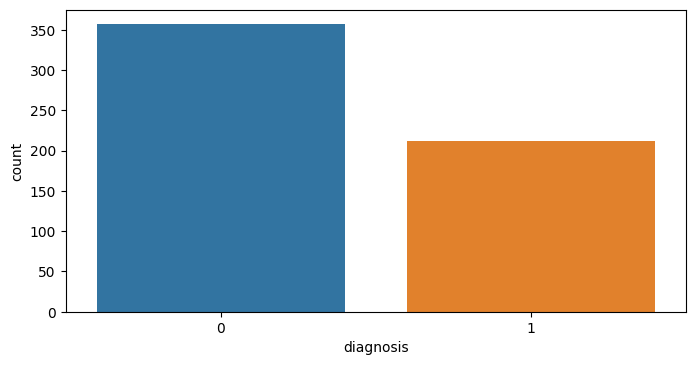

In [5]:
plt.figure(figsize = (8, 4), dpi = 100)
sns.countplot(data = df, x = 'diagnosis')
plt.show()

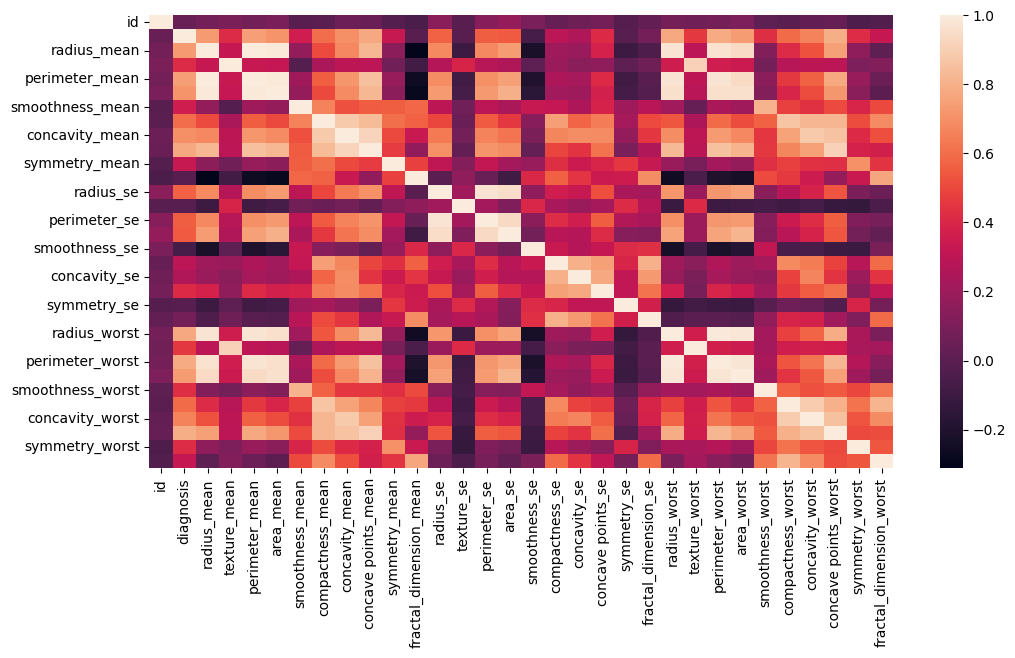

In [6]:
plt.figure(figsize = (12, 6), dpi = 100)
sns.heatmap(df.corr());

# Model Building

In [7]:
X = df.drop('diagnosis', axis = 1).values
y = df['diagnosis'].values

In [8]:
# 80-20 Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [9]:
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
i = Input(shape=(None, 455, 31))

x = Dense(16, activation='relu')(i)
x = Dropout(0.5)(x)

x = Dense(32, activation='relu')(i)
x = Dropout(0.5)(x)

x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)

x = Dense(32, activation='relu')(x)
x = Dropout(0.5)(x)

x = Dense(16, activation='relu')(x)
x = Dropout(0.5)(x)

y = Dense(1, activation='sigmoid')(x)

model_adam = Model(inputs=i, outputs=y)


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

In [11]:
model_adam.compile(optimizer='adam', 
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

model_adam.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, 455, 31)]   0         
_________________________________________________________________
dense_1 (Dense)              (None, None, 455, 32)     1024      
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 455, 32)     0         
_________________________________________________________________
dense_2 (Dense)              (None, None, 455, 64)     2112      
_________________________________________________________________
dropout_2 (Dropout)          (None, None, 455, 64)     0         
_________________________________________________________________
dense_3 (Dense)              (None, None, 455, 32)     2080      
_________________________________________________________________
dropout_3 (Dropout)          (None, None, 455, 32)     0     

In [12]:
early_stopping = EarlyStopping(monitor='val_loss', patience=25)

history_adam = model_adam.fit(x=X_train, y=y_train,
                             validation_data=(X_test, y_test),
                             epochs=500,
                             callbacks=[early_stopping])

Epoch 1/500


2022-01-14 08:01:51.743072: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


15/15 [==============================] - 1s 20ms/step - loss: 0.7159 - accuracy: 0.5209 - val_loss: 0.6644 - val_accuracy: 0.8860
Epoch 2/500
15/15 [==============================] - 0s 5ms/step - loss: 0.6869 - accuracy: 0.6022 - val_loss: 0.6500 - val_accuracy: 0.7018
Epoch 3/500
15/15 [==============================] - 0s 6ms/step - loss: 0.6706 - accuracy: 0.6242 - val_loss: 0.6404 - val_accuracy: 0.7193
Epoch 4/500
15/15 [==============================] - 0s 5ms/step - loss: 0.6762 - accuracy: 0.6220 - val_loss: 0.6296 - val_accuracy: 0.7456
Epoch 5/500
15/15 [==============================] - 0s 5ms/step - loss: 0.6409 - accuracy: 0.7187 - val_loss: 0.6118 - val_accuracy: 0.7544
Epoch 6/500
15/15 [==============================] - 0s 5ms/step - loss: 0.6461 - accuracy: 0.6615 - val_loss: 0.5959 - val_accuracy: 0.7544
Epoch 7/500
15/15 [==============================] - 0s 5ms/step - loss: 0.6391 - accuracy: 0.7033 - val_loss: 0.5823 - val_accuracy: 0.7895
Epoch 8/500
15/15 [=====

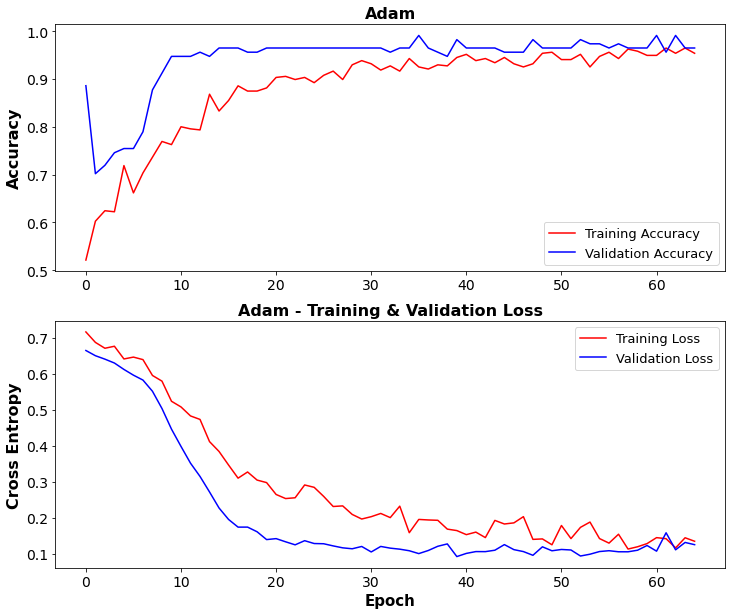

In [13]:
acc = history_adam.history['accuracy']
val_acc = history_adam.history['val_accuracy']

loss = history_adam.history['loss']
val_loss = history_adam.history['val_loss']

plt.figure(figsize=(12, 10))
plt.subplot(2, 1, 1)

plt.plot(acc, label='Training Accuracy', color='r')
plt.plot(val_acc, label='Validation Accuracy', color='b')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='lower right', fontsize=13)
plt.ylabel('Accuracy', fontsize=16, weight='bold')
plt.title('Adam', fontsize=16, weight='bold')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss', color='r')
plt.plot(val_loss, label='Validation Loss', color='b')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=13)
plt.ylabel('Cross Entropy', fontsize=16, weight='bold')
plt.title('Adam - Training & Validation Loss', fontsize=16, weight='bold')
plt.xlabel('Epoch', fontsize=15, weight='bold')
plt.show()

In [14]:
from sklearn.metrics import classification_report

Y_pred = model_adam.predict(X_test)
y_pred = np.round(Y_pred).astype(int)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        72
           1       0.93      0.98      0.95        42

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



Normalized confusion matrix


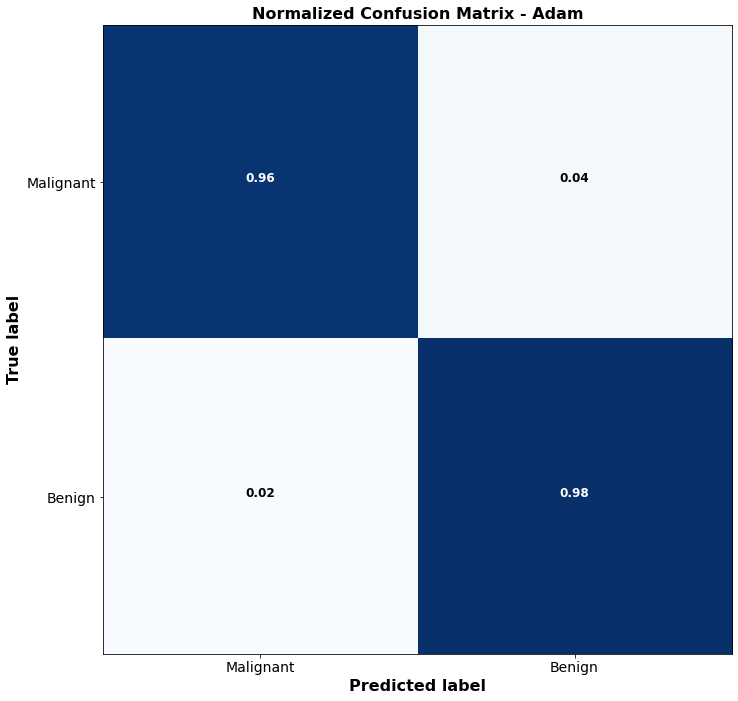

In [15]:
import itertools
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, weight='bold', fontsize=16)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=14)
    plt.yticks(tick_marks, classes, fontsize=14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", fontsize=12, weight='bold',
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', fontsize=16, weight='bold')
    plt.xlabel('Predicted label', fontsize=16, weight='bold')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['Malignant', 'Benign'],normalize=True,
                      title='Normalized Confusion Matrix - Adam')
plt.show()

## **RMSProp**

In [16]:
model_rmsprop = Model(inputs=i, outputs=y)

model_rmsprop.compile(optimizer='rmsprop', 
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

history_rmsprop = model_rmsprop.fit(x=X_train, y=y_train,
                             validation_data=(X_test, y_test),
                             epochs=500,
                             callbacks=[early_stopping])

Epoch 1/500
15/15 [==============================] - 1s 18ms/step - loss: 0.1593 - accuracy: 0.9451 - val_loss: 0.1265 - val_accuracy: 0.9912
Epoch 2/500
15/15 [==============================] - 0s 6ms/step - loss: 0.1120 - accuracy: 0.9626 - val_loss: 0.1343 - val_accuracy: 0.9737
Epoch 3/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1352 - accuracy: 0.9538 - val_loss: 0.1450 - val_accuracy: 0.9649
Epoch 4/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1360 - accuracy: 0.9604 - val_loss: 0.1420 - val_accuracy: 0.9649
Epoch 5/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1470 - accuracy: 0.9538 - val_loss: 0.1428 - val_accuracy: 0.9649
Epoch 6/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1356 - accuracy: 0.9516 - val_loss: 0.1257 - val_accuracy: 0.9912
Epoch 7/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1355 - accuracy: 0.9604 - val_loss: 0.1329 - val_accuracy: 0.9737
Epoch 8/500


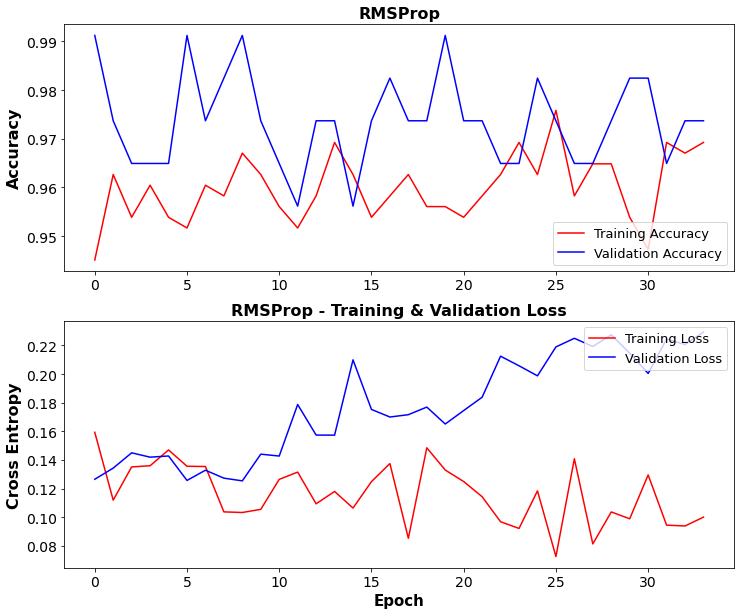

In [17]:
acc = history_rmsprop.history['accuracy']
val_acc = history_rmsprop.history['val_accuracy']

loss = history_rmsprop.history['loss']
val_loss = history_rmsprop.history['val_loss']

plt.figure(figsize=(12, 10))
plt.subplot(2, 1, 1)

plt.plot(acc, label='Training Accuracy', color='r')
plt.plot(val_acc, label='Validation Accuracy', color='b')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='lower right', fontsize=13)
plt.ylabel('Accuracy', fontsize=16, weight='bold')
plt.title('RMSProp', fontsize=16, weight='bold')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss', color='r')
plt.plot(val_loss, label='Validation Loss', color='b')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=13)
plt.ylabel('Cross Entropy', fontsize=16, weight='bold')
plt.title('RMSProp - Training & Validation Loss', fontsize=16, weight='bold')
plt.xlabel('Epoch', fontsize=15, weight='bold')
plt.show()

In [18]:
from sklearn.metrics import classification_report

Y_pred_r = model_rmsprop.predict(X_test)
y_pred_r = np.round(Y_pred_r).astype(int)

print(classification_report(y_test, y_pred_r))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        72
           1       0.95      0.98      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Normalized confusion matrix


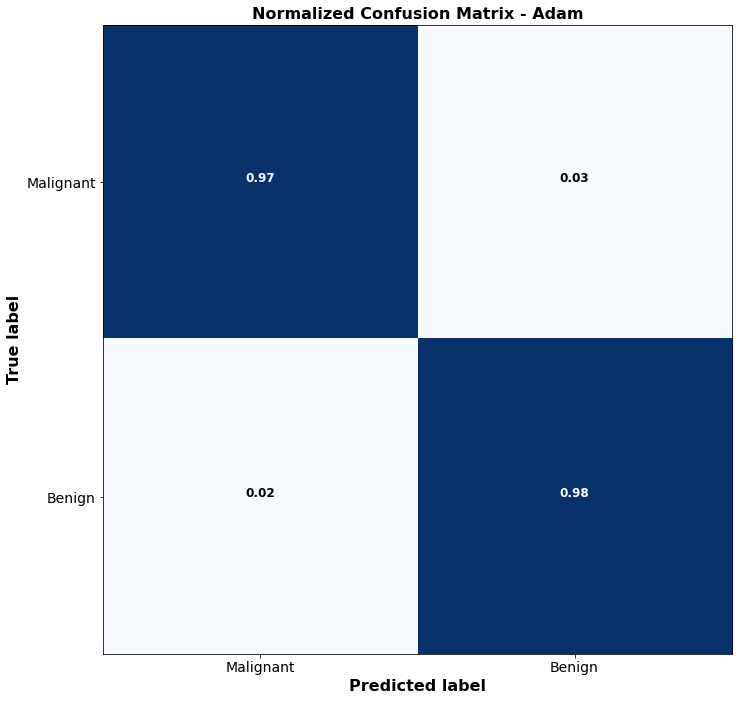

In [19]:
import itertools
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, weight='bold', fontsize=16)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=14)
    plt.yticks(tick_marks, classes, fontsize=14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", fontsize=12, weight='bold',
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', fontsize=16, weight='bold')
    plt.xlabel('Predicted label', fontsize=16, weight='bold')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_r)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['Malignant', 'Benign'],normalize=True,
                      title='Normalized Confusion Matrix - Adam')
plt.show()

# **Conclution**
#### **Adam Optimizer is the best choice here**
#### **Results: 98% Accurcay**
* **Adam: 98% Accurcay**
* **RMSProp: 97% Accurcay**

